# Sales media analysis

### Project Overview

A CPG Major wanted to analyse the Impact of Sales on Media , promotion,distribution, price competition and demographics.It will help answer following business questions:

Whare are the contribution of each factor on sales?
What should be our strategy to increase sales ?
How should we maximize the ROI from our Advertising, pricing, Distribution, Media ?

### Dataset:
The dataset has details of 109 entries with the following 15 features (we are doing particular market mix for a particular detergent brand on india market)

#### Features:
- **Date**:When the sales happen
- **Channel**: Which medium the sale happened
- **Price**: Price of the brand
- **Competor price**: Competor price of the brand
- **Distribution**: ACV( for how many stores by brand is avalable( breath))
- **Share of features**: how many small promotion retailer do inside store for that brand
- **Share of display**: how many big hording that retailer gives outside store
- **Share of self**: how may self are filled by my brand
- **Trade Propmotion8**: The promotion given by retailer to brand inside the store
- **GRP_TV**: how many times my brand was advertised in tv
- **GRP_Radio**: how many times my brand was advertised in Radio
- **GRP_Newspaper**: how many times my brand was advertised in Newspaper
- **GRP_Internet**: how many times my brand was advertised in Internet
- **Seasonality**: The seasonal component of sales

#### Target:
- **Net Sales**: Dependent variables(sales done on brand)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('Salesmedia-GP.csv')

In [3]:
df.head()

,Date,Channel,Net Sales,price,Distribution,Share of Features,Share of Display,Share of Shelf,GRP_TV,GRP_Radio,GRP_Newspaper,GRP_internet,Seasonality,competor price,Trade promotion
0,1/1/2015,PHARMACIES,17.06,120.11,532.07,119.17,0.0,251.08,53.06,30.0,27.0,22.0,0.20,116,107
1,2/1/2015,PHARMACIES,17.25,94.27,548.08,122.08,0.0,196.77,44.74,23.0,36.0,20.0,0.32,118,116
2,3/1/2015,PHARMACIES,16.94,125.56,532.78,118.25,0.0,241.23,40.00,21.0,27.0,34.0,0.36,139,112
3,4/1/2015,PHARMACIES,16.63,103.88,529.64,117.49,0.0,203.41,43.59,28.0,25.0,37.0,0.13,102,104
4,5/1/2015,PHARMACIES,16.83,120.37,504.24,120.01,0.0,217.31,39.67,39.0,22.0,31.0,0.23,136,105


In [4]:
df.shape

(108, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 15 columns):
Date                 108 non-null object
Channel              108 non-null object
Net Sales            108 non-null float64
price                108 non-null float64
Distribution         108 non-null float64
Share of Features    108 non-null float64
Share of Display     108 non-null float64
Share of Shelf       108 non-null float64
GRP_TV               108 non-null float64
GRP_Radio            108 non-null float64
GRP_Newspaper        108 non-null float64
GRP_internet         108 non-null float64
Seasonality          108 non-null float64
competor price       108 non-null int64
Trade promotion      108 non-null int64
dtypes: float64(11), int64(2), object(2)
memory usage: 12.8+ KB


In [6]:
df.drop('Date',1,inplace=True)

In [7]:
X = df.drop('Net Sales',1)
y = df['Net Sales']

In [8]:
categorical = df.select_dtypes(include='O')
numerical = df.select_dtypes(include='number')

In [9]:
numerical

,Net Sales,price,Distribution,Share of Features,Share of Display,Share of Shelf,GRP_TV,GRP_Radio,GRP_Newspaper,GRP_internet,Seasonality,competor price,Trade promotion
0,17.06,120.11,532.07,119.17,0.00,251.08,53.06,30.0,27.0,22.0,0.20,116,107
1,17.25,94.27,548.08,122.08,0.00,196.77,44.74,23.0,36.0,20.0,0.32,118,116
2,16.94,125.56,532.78,118.25,0.00,241.23,40.00,21.0,27.0,34.0,0.36,139,112
3,16.63,103.88,529.64,117.49,0.00,203.41,43.59,28.0,25.0,37.0,0.13,102,104
4,16.83,120.37,504.24,120.01,0.00,217.31,39.67,39.0,22.0,31.0,0.23,136,105
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,5.55,128.51,2.21,128.31,150.63,134.27,0.00,25.0,40.0,36.0,0.26,121,113
104,5.40,129.63,1.50,129.48,154.57,129.75,0.00,34.0,38.0,37.0,0.11,142,108
105,5.53,127.60,1.66,127.32,167.15,152.24,0.00,39.0,40.0,24.0,0.42,123,110
106,5.47,128.96,1.43,128.89,162.51,133.36,0.00,34.0,32.0,37.0,0.10,148,117


In [10]:
categorical

,Channel
0,PHARMACIES
1,PHARMACIES
2,PHARMACIES
3,PHARMACIES
4,PHARMACIES
...,...
103,TOTAL GROCERIES
104,TOTAL GROCERIES
105,TOTAL GROCERIES
106,TOTAL GROCERIES


In [11]:
df.isnull().sum()

Channel              0
Net Sales            0
price                0
Distribution         0
Share of Features    0
Share of Display     0
Share of Shelf       0
GRP_TV               0
GRP_Radio            0
GRP_Newspaper        0
GRP_internet         0
Seasonality          0
competor price       0
Trade promotion      0
dtype: int64

- Advertising adstock is a term coined by Simon Broadbent to describe the prolonged or lagged effect of advertising on consumer purchase behavior. 

- It is also known as 'advertising carry-over' for all the media variables we have to multiply with adstock effect of 0.3 which is the industry standard for cpg

In [12]:
def log_trans( df):
    df=np.log(df.replace(0, 0.0001))
    return df

sales = pd.concat([numerical, pd.get_dummies(categorical)],axis=1)

sales["GRP_TV"]=0.3*sales["GRP_TV"]
sales["GRP_Radio"]=0.3*sales["GRP_Radio"]
sales["GRP_Newspaper"]=0.3*sales["GRP_Newspaper"]
sales["GRP_internet"]=0.3*sales["GRP_internet"]


x=sales[['Net Sales','price', 'Distribution', 'Share of Features',
       'Share of Display', 'Share of Shelf', 'GRP_TV', 'GRP_Radio',
       'GRP_Newspaper', 'GRP_internet', 'Seasonality', 'competor price',
       'Trade promotion']]

sales_log = log_trans(x)

sales_cat = sales[['Channel_PHARMACIES', 'Channel_SUPERMARKETS', 'Channel_TOTAL GROCERIES']]

sales = pd.concat([sales_log,sales_cat],axis=1)

In [13]:
sales.head()

,Net Sales,price,Distribution,Share of Features,Share of Display,Share of Shelf,GRP_TV,GRP_Radio,GRP_Newspaper,GRP_internet,Seasonality,competor price,Trade promotion,Channel_PHARMACIES,Channel_SUPERMARKETS,Channel_TOTAL GROCERIES
0,2.836737,4.788408,6.276775,4.780551,-9.21034,5.525772,2.767451,2.197225,2.091864,1.887070,-1.609438,4.753590,4.672829,1,0,0
1,2.847812,4.546163,6.306421,4.804677,-9.21034,5.282036,2.596895,1.931521,2.379546,1.791759,-1.139434,4.770685,4.753590,1,0,0
2,2.829678,4.832784,6.278109,4.772801,-9.21034,5.485751,2.484907,1.840550,2.091864,2.322388,-1.021651,4.934474,4.718499,1,0,0
3,2.811208,4.643236,6.272198,4.766353,-9.21034,5.315224,2.570855,2.128232,2.014903,2.406945,-2.040221,4.624973,4.644391,1,0,0
4,2.823163,4.790570,6.223052,4.787575,-9.21034,5.381325,2.476622,2.459589,1.887070,2.230014,-1.469676,4.912655,4.653960,1,0,0


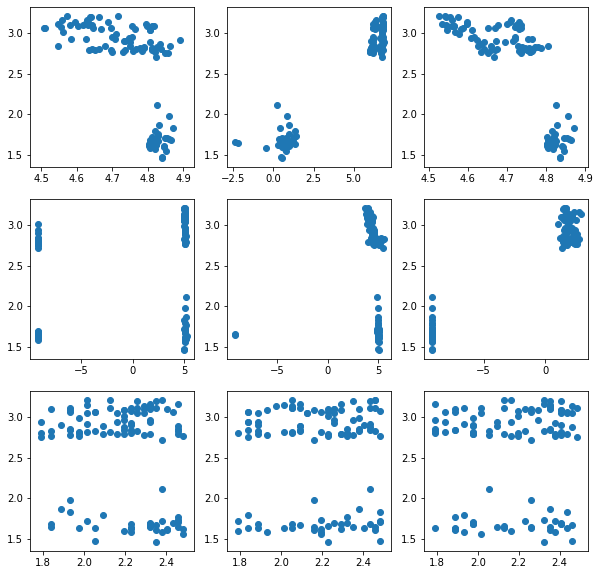

In [14]:
cols=['price','Distribution', 'Share of Features',
       'Share of Display', 'Share of Shelf', 'GRP_TV', 'GRP_Radio',
       'GRP_Newspaper', 'GRP_internet', 'Seasonality', 'competor price',
       'Trade promotion', 'Channel_PHARMACIES', 'Channel_SUPERMARKETS',
       'Channel_TOTAL GROCERIES']

X_train = sales[cols]
y_train = sales['Net Sales']


cols = X_train.columns

fig, axes = plt.subplots(3,3,figsize=(10,10))

for i in range(3):
    for j in range(3):
        col = cols[i * 3 + j]
        axes[i,j].scatter(X_train[col],y_train)

plt.show()

In [15]:
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

- If the prices are higher net sales are down
- With higher distribution has higher avalability so higher sales
- With high share of features sales is down may be due to promotion in efficency
- With higher grp Tv means higher sales as more adverstise in media

In [16]:
# import packages
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# separate train and test sets
X = sales.drop(labels=['Net Sales'],axis=1)
y = sales['Net Sales']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=10)

#filling the NA in test as zeros
X_test.fillna(0, inplace=True)

# add the constant
X_train_0 = sm.add_constant(X_train)
X_test_0 = sm.add_constant(X_test)

# apply the ols model
ols = sm.OLS(endog=y_train, exog= X_train_0).fit()
print(ols.summary())

# Prediction for ols model
y_pred_ols = ols.predict(X_test_0)

#Evaluvation: MSE
mse = mean_squared_error(y_pred_ols, y_test)
print('The Mean Square Error(MSE)',mse)


                            OLS Regression Results                            
Dep. Variable:              Net Sales   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     166.1
Date:                Wed, 08 Jul 2020   Prob (F-statistic):           1.75e-42
Time:                        17:50:38   Log-Likelihood:                 67.764
No. Observations:                  75   AIC:                            -105.5
Df Residuals:                      60   BIC:                            -70.77
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

C:\Users\Mrunal\Anaconda3\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs
C:\Users\Mrunal\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


**Goodness of Fit**
- R2 is 98.4% is very good(>80% is considred good)
- VIF is 62.8%( There is multicollearity but that is because 'Share of Features' and 'GRP_TV'
- MSE of 0.01 is good

**Feature Important**
- Own price has high contribtion towards sales which is -
- Distribution has moderate contribtuion towards sales which is +
- share of features has high contrbution towards sales which is -

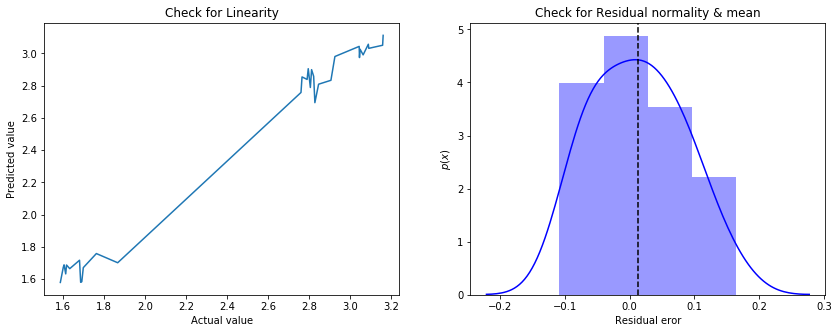

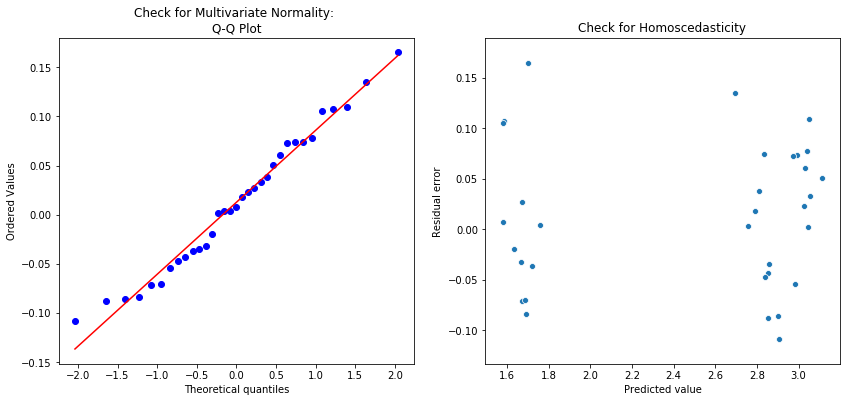

In [17]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.lineplot(y_test,y_pred_ols,ax=ax)
plt.title('Check for Linearity')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred_ols),ax=ax,color='b')
plt.axvline((y_test - y_pred_ols).mean(),color='k',linestyle='--')
plt.title('Check for Residual normality & mean')
plt.xlabel('Residual eror')
plt.ylabel('$p(x)$');

# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_ols),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_ols), x= y_pred_ols, ax = ax[1]) 
ax[1].set_title('Check for Homoscedasticity')
plt.xlabel('Predicted value')
plt.ylabel('Residual error');
